<a href="https://colab.research.google.com/github/vinikev/nba-data-analysis/blob/main/nba_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Vinícius Azevedo Monteiro

**Dataset:** [NBA Players stats since 1950
] https://www.kaggle.com/datasets/drgilermo/nba-players-stats?resource=download&select=Players.csv




# Descrição do Problema

O **NBA Players stats since 1950** contém dados históricos da NBA (1950-2017), incluindo:

Informações dos jogadores (posição, altura, peso, idade).

Números por temporada (pontos, assistências, rebotes, cestas de 3).

Entre muitos outros que não serão utilizados nessa análise

## Hipóteses da análise

Foram formuladas as seguintes hipóteses para investigação:

**1.Influência da Posição nas Estatísticas**

Verificar se a posição em quadra determina significativamente o desempenho estatístico dos jogadores.

**2.Relação entre Altura e Desempenho**

Identificar quais métricas apresentam correlação positiva com a altura dos atletas.

**3.Aderência dos Dados aos Padrões Táticos**

Avaliar se as estatísticas observadas correspondem às expectativas táticas para cada posição.

**4.Distribuição de Talentos por Posição**

Investigar a existência de concentração ou equilíbrio no desempenho entre as diferentes posições.

**5.Frequência de Outliers de Desempenho**

Quantificar a ocorrência de valores excepcionais ("craques") em relação à média geral.

## Tipo de Problema

Este é um problema de **classificação não supervisionada**. Não há uma variável alvo para prever ou classificar. A ideia é entender padrões e correlações entre variáveis através dos dados disponíveis.

## Atributos do Dataset

O dataset **NBA Players stats since 1950** contém 24691 amostras, onde cada registro é um jogador em uma temporada. Dentre todos os atributos disponíveis iremos utilizar os seguintes:

- ***Player*** (Nome completo do jogador)
- ***Height*** (Altura do jogador em cm)
- ***Pos*** (Posição do jogador)
- ***PTS*** (Quantidade de pontos na temporada)
- ***AST*** (Quantidade de assistências na temporada)
- ***TRB*** (Quantidade de rebotes na temporada)
- ***3P*** (Quantidade de cestas de 3 pontos na temporada)
- ***3PA*** (Quantidade de tentativas de cestas de 3 pontos na temporada)
- ***G*** (Quantidade de partidas jogadas na temporada)
- ***Year*** (Ano da temporada)


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reseta TODAS as configurações de display para os valores originais
pd.reset_option('^display.', silent=True)

In [16]:
df_stats = pd.read_csv('https://raw.githubusercontent.com/vinikev/nba-data-analysis/refs/heads/main/Seasons_Stats.csv') # Importando o dataset com as stats por temporada e guardando em um dataframe

In [17]:
print(df_stats.head()) # Primeiras linhas

   Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...    FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  ...  0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  ...  0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  ...  0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  ...  0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 53 columns]


In [18]:
print(df_stats.tail()) # Últimas linhas

       Unnamed: 0    Year             Player Pos   Age   Tm     G    GS  \
24686       24686  2017.0        Cody Zeller  PF  24.0  CHO  62.0  58.0   
24687       24687  2017.0       Tyler Zeller   C  27.0  BOS  51.0   5.0   
24688       24688  2017.0  Stephen Zimmerman   C  20.0  ORL  19.0   0.0   
24689       24689  2017.0        Paul Zipser  SF  22.0  CHI  44.0  18.0   
24690       24690  2017.0        Ivica Zubac   C  19.0  LAL  38.0  11.0   

           MP   PER  ...    FT%    ORB    DRB    TRB   AST   STL   BLK   TOV  \
24686  1725.0  16.7  ...  0.679  135.0  270.0  405.0  99.0  62.0  58.0  65.0   
24687   525.0  13.0  ...  0.564   43.0   81.0  124.0  42.0   7.0  21.0  20.0   
24688   108.0   7.3  ...  0.600   11.0   24.0   35.0   4.0   2.0   5.0   3.0   
24689   843.0   6.9  ...  0.775   15.0  110.0  125.0  36.0  15.0  16.0  40.0   
24690   609.0  17.0  ...  0.653   41.0  118.0  159.0  30.0  14.0  33.0  30.0   

          PF    PTS  
24686  189.0  639.0  
24687   61.0  178.0  
24

In [19]:
print(f"Total de instâncias: {len(df_stats)}") # Visualizando a quantidade de linhas
print("\nTipos de dados por coluna:")
print(df_stats.info()) # Entendendo o tipo de cada coluna

Total de instâncias: 24691

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%       

**ETAPA DE FILTRAGEM DE DADOS**

**Foram aplicados os seguintes critérios de seleção:**

**Período temporal:** Selecionaram-se apenas registros posteriores ao ano 2000, com o objetivo de analisar o período contemporâneo da NBA.

**Posições analisadas:** Mantiveram-se exclusivamente as cinco posições mais frequentes, descartando-se variações híbridas ou de ocorrência marginal.

**Variáveis relevantes:** Consideraram-se somente as colunas com correlação direta com as hipóteses investigadas.

**Padronização de dados:** Eliminaram-se observações com valores ausentes ou zerados nas variáveis:

Pontos (PTS)

Assistências (AST)

Rebotes (TRB)

Partidas disputadas (G)

In [20]:
# Filtrar dados a partir do ano 2000
df_stats = df_stats[df_stats['Year'] >= 2000]

# Filtrar as 5 posições mais comuns
top_positions = df_stats['Pos'].value_counts().nlargest(5).index
df_stats = df_stats[df_stats['Pos'].isin(top_positions)]

# Selecionar colunas relevantes
cols_to_keep = ['Player', 'Pos', 'PTS', 'AST', 'TRB', '3P', '3PA', 'G', 'Year']
df_stats = df_stats[cols_to_keep]

# Remover linhas onde PTS, AST, TRB ou G são zero OU nulos
df_stats = df_stats[
    (df_stats['PTS'] > 0) &
    (df_stats['AST'] > 0) &
    (df_stats['TRB'] > 0) &
    (df_stats['G'] > 0) &
    (df_stats['PTS'].notna()) &
    (df_stats['AST'].notna()) &
    (df_stats['TRB'].notna()) &
    (df_stats['G'].notna())
]

print(df_stats.head())

                    Player Pos     PTS    AST    TRB    3P   3PA     G    Year
14470    Tariq Abdul-Wahad  SG   697.0   98.0  291.0   3.0  23.0  61.0  2000.0
14471    Tariq Abdul-Wahad  SG   563.0   72.0  239.0   2.0  21.0  46.0  2000.0
14472    Tariq Abdul-Wahad  SG   134.0   26.0   52.0   1.0   2.0  15.0  2000.0
14473  Shareef Abdur-Rahim  SF  1663.0  271.0  825.0  29.0  96.0  82.0  2000.0
14474       Cory Alexander  PG    82.0   58.0   42.0   9.0  35.0  29.0  2000.0


In [21]:
# Estatísticas descritivas básicas do dataset
df_stats.describe()

,PTS,AST,TRB,3P,3PA,G,Year
count,9588.000000,9588.000000,9588.000000,9588.000000,9588.000000,9588.000000,9588.000000
mean,476.467981,105.395494,204.118169,31.493221,88.641948,50.123696,2008.800793
std,455.819419,128.200473,192.025756,44.507798,117.722061,25.042922,5.167049
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2000.000000
25%,109.000000,18.000000,55.000000,0.000000,2.000000,27.000000,2004.000000
50%,339.000000,60.000000,151.000000,9.000000,31.000000,55.000000,2009.000000
75%,717.000000,140.000000,293.000000,50.000000,142.000000,74.000000,2013.000000
max,2832.000000,925.000000,1226.000000,402.000000,886.000000,85.000000,2017.000000


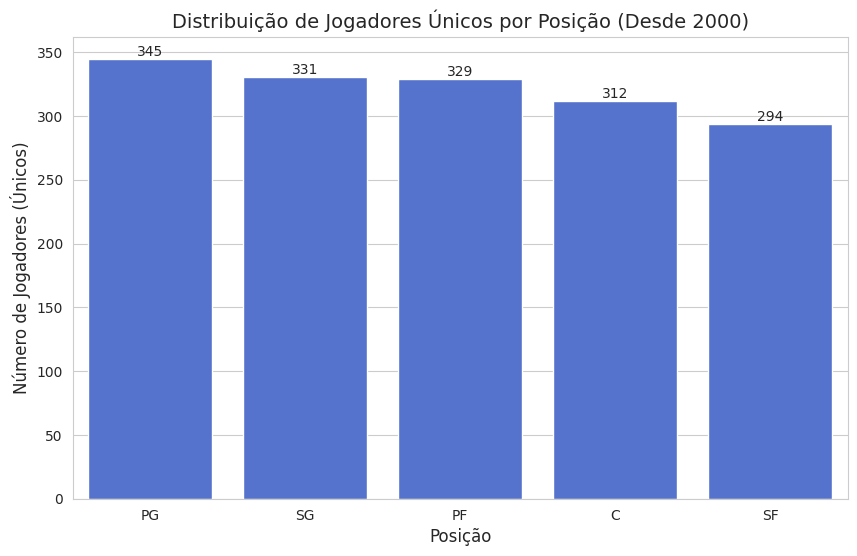

In [22]:
# Configurar o estilo do gráfico
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Criar DataFrame sem duplicatas de jogadores
df_unique_players = df_stats.drop_duplicates(subset='Player', keep='first')

# Criar gráfico de barras com jogadores únicos
ax = sns.countplot(
    data=df_unique_players,
    x='Pos',
    order=df_unique_players['Pos'].value_counts().index,
    color='royalblue'
)

# Adicionar título e labels
plt.title('Distribuição de Jogadores Únicos por Posição (Desde 2000)', fontsize=14)
plt.xlabel('Posição', fontsize=12)
plt.ylabel('Número de Jogadores (Únicos)', fontsize=12)

# Adicionar contagem em cima de cada barra
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.show()

**ANÁLISE DA DISTRIBUIÇÃO DE JOGADORES POR POSIÇÃO**

Observa-se que a distribuição de jogadores por posição ao longo do período analisado apresenta relativo equilíbrio, com verifica-se ligeira predominância das posições de maior protagonismo ofensivo.

**LEGENDA TÉCNICA DAS POSIÇOES:**

- **PG (Point Guard/Armador):** Responsável pela organização ofensiva e criação de jogadas.

- **SG (Shooting Guard/Ala-armador):** Especializado em arremessos de média e longa distância.

- **PF (Power Forward/Ala-pivô):** Atua na região do garrafão, destacando-se em jogadas de força física e rebote.

- **C (Center/Pivô):** Geralmente o jogador de maior estatura, com atuação predominante na defesa e rebotes.

- **SF (Small Forward/Ala):** Jogador versátil, com participação equilibrada em ações ofensivas e defensivas.

**PROCEDIMENTOS DE ANÁLISE**

**CÁLCULO DE MÉDIAS POR JOGO**
Foram calculados os valores médios por partida para:

- Pontos marcados (PTS)

- Assistências realizadas (AST)

- Rebotes conquistados (TRB)

Esses indicadores constituem a base para as análises subsequentes.

**VISUALIZAÇÃO DE DISTRIBUIÇÕES**
Para cada métrica calculada, geraram-se histogramas com as seguintes características:

**Eixo x:** Valores médios por jogo

**Eixo y:** Frequência de ocorrência

Configuração padrão: 20 bins e curva de densidade (KDE)

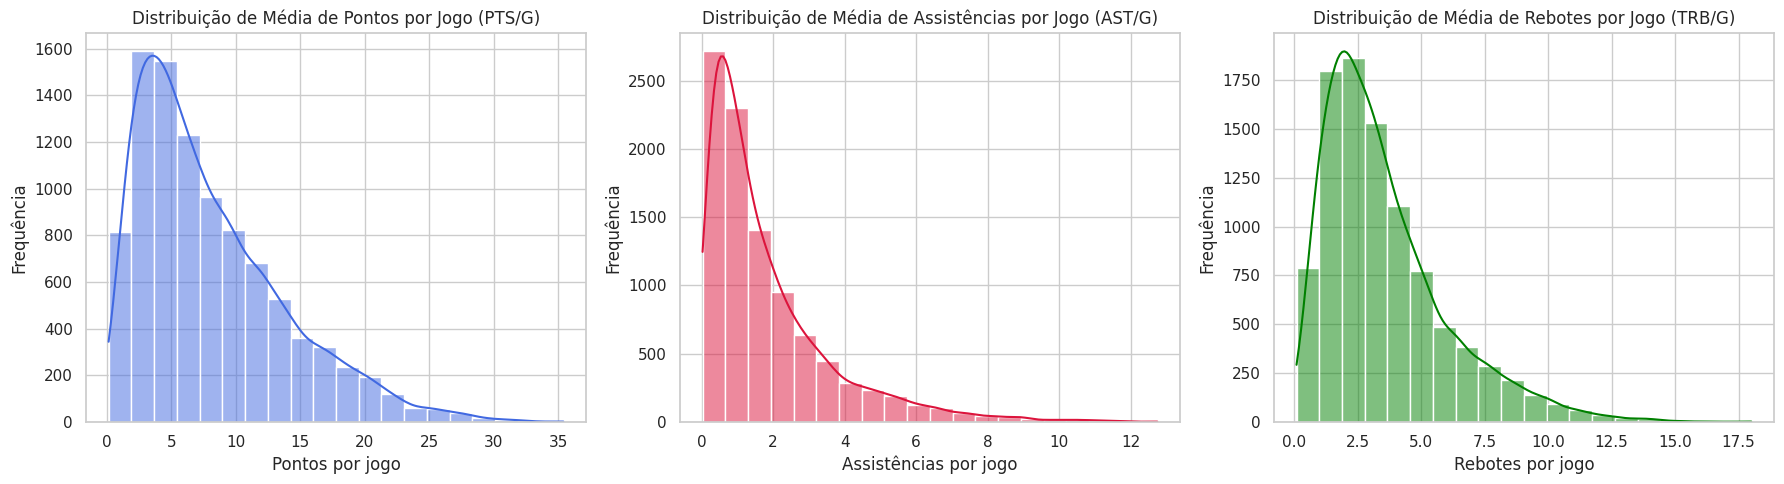

In [23]:
# Calcular médias por jogo
df_stats['PTS_per_game'] = df_stats['PTS'] / df_stats['G']
df_stats['AST_per_game'] = df_stats['AST'] / df_stats['G']
df_stats['TRB_per_game'] = df_stats['TRB'] / df_stats['G']

# Configuração do estilo
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# Histograma de Média de Pontos por Jogo
plt.subplot(1, 3, 1)
sns.histplot(data=df_stats, x='PTS_per_game', bins=20, kde=True, color='royalblue')
plt.title('Distribuição de Média de Pontos por Jogo (PTS/G)')
plt.xlabel('Pontos por jogo')
plt.ylabel('Frequência')

# Histograma de Média de Assistências por Jogo
plt.subplot(1, 3, 2)
sns.histplot(data=df_stats, x='AST_per_game', bins=20, kde=True, color='crimson')
plt.title('Distribuição de Média de Assistências por Jogo (AST/G)')
plt.xlabel('Assistências por jogo')
plt.ylabel('Frequência')

# Histograma de Média de Rebotes por Jogo
plt.subplot(1, 3, 3)
sns.histplot(data=df_stats, x='TRB_per_game', bins=20, kde=True, color='green')
plt.title('Distribuição de Média de Rebotes por Jogo (TRB/G)')
plt.xlabel('Rebotes por jogo')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

**ANÁLISE DOS HISTOGRAMAS**

**Distribuição das estatísticas por jogo:**

1.**Pontos por Jogo (PTS/G)**

- Apresenta distribuição assimétrica positiva
- Concentração principal: 5-15 pontos por jogo
- Frequência decrescente para valores superiores
- Indica que a maioria dos jogadores apresenta contribuição moderada em pontuação

2.**Assistências por Jogo (AST/G)**

- Distribuição concentrada na faixa 0-5 assistências
- Cauda direita alongada, atingindo até ~10 assistências
- Valores acima de 8 assistências/jogo apresentam baixa frequência

3.**Rebotes por Jogo (TRB/G)**

- Pico de frequência entre 0-5 rebotes
- Distribuição com cauda estendida até ~15 rebotes
- Poucos casos ultrapassam 10 rebotes/jogo

**Observação sobre outliers:**
Mesmo considerando múltiplas temporadas de atletas excepcionais (LeBron James, Shaquille O'Neal, Kobe Bryant), os valores extremos mantêm-se estatisticamente raros, o que explica o reconhecimento diferenciado desses atletas no contexto esportivo.

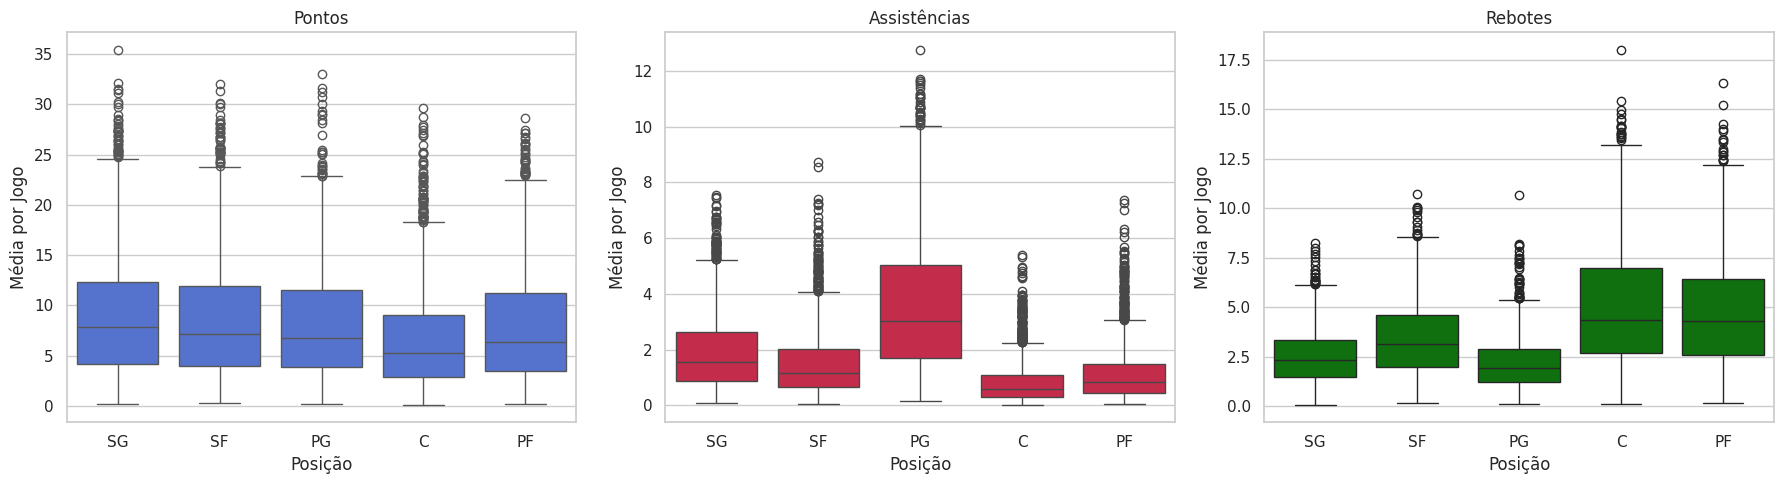

In [24]:
# Configuração do estilo
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# Boxplot de Média de Pontos por Posição
plt.subplot(1, 3, 1)
sns.boxplot(x='Pos', y='PTS_per_game',data=df_stats, color='royalblue')
plt.title('Pontos')
plt.xlabel('Posição')
plt.ylabel('Média por Jogo')

# Boxplot de Média de Assistências por Posição
plt.subplot(1, 3, 2)
sns.boxplot(x='Pos', y='AST_per_game', data=df_stats, color='crimson')
plt.title('Assistências')
plt.xlabel('Posição')
plt.ylabel('Média por Jogo')

# Boxplot de Média de Rebotes por Posição
plt.subplot(1, 3, 3)
sns.boxplot(x='Pos', y='TRB_per_game', data=df_stats, color='green')
plt.title('Rebotes')
plt.xlabel('Posição')
plt.ylabel('Média por Jogo')

plt.tight_layout()
plt.show()

**ANÁLISE DOS BOXPLOTS POR POSIÇÃO**

**Distribuição das estatísticas:**

1.**Pontos por Jogo (PTS/G)**

- Observa-se contribuição similar entre a maioria das posições
- Maiores medianas identificadas em SG (Ala-armador) e PG (Armador), corroborando o caráter ofensivo dessas posições
- C (Pivô) apresenta a menor média, condizente com sua função predominantemente defensiva

2.**Assistências por Jogo (AST/G)**

- Dominância clara da posição PG (Armador), conforme esperado em sua função tática
- Valores máximos de C (Pivô) equivalem às medianas de PG (Armador), evidenciando a diferença de atuação

3.**Rebotes por Jogo (TRB/G)**

- Maiores valores concentram-se em C (Pivô) e PF (Ala-pivô), respectivamente para:
 - Rebotes defensivos (C)
 - Rebotes ofensivos (PF)
- PG (Armador) apresenta contribuição marginal, característica de jogadores com menor estatura e maior mobilidade

In [25]:
#Carregando mais um dataset para conseguir a informação da altura de cada jogador
df_player = pd.read_csv('https://raw.githubusercontent.com/vinikev/nba-data-analysis/refs/heads/main/Players.csv')

print(df_player.head())

   Unnamed: 0           Player  height  weight  \
0           0  Curly Armstrong   180.0    77.0   
1           1     Cliff Barker   188.0    83.0   
2           2    Leo Barnhorst   193.0    86.0   
3           3       Ed Bartels   196.0    88.0   
4           4      Ralph Beard   178.0    79.0   

                           collage    born   birth_city birth_state  
0               Indiana University  1918.0          NaN         NaN  
1           University of Kentucky  1921.0     Yorktown     Indiana  
2         University of Notre Dame  1924.0          NaN         NaN  
3  North Carolina State University  1925.0          NaN         NaN  
4           University of Kentucky  1927.0  Hardinsburg    Kentucky  


In [26]:
# Merge mantendo todas as linhas do df_stats principal
df_stats = pd.merge(
    left=df_stats,
    right=df_player[['Player', 'height']],
    on='Player',
    how='left'
)

print(df_stats.head())

                Player Pos     PTS    AST    TRB    3P   3PA     G    Year  \
0    Tariq Abdul-Wahad  SG   697.0   98.0  291.0   3.0  23.0  61.0  2000.0   
1    Tariq Abdul-Wahad  SG   563.0   72.0  239.0   2.0  21.0  46.0  2000.0   
2    Tariq Abdul-Wahad  SG   134.0   26.0   52.0   1.0   2.0  15.0  2000.0   
3  Shareef Abdur-Rahim  SF  1663.0  271.0  825.0  29.0  96.0  82.0  2000.0   
4       Cory Alexander  PG    82.0   58.0   42.0   9.0  35.0  29.0  2000.0   

   PTS_per_game  AST_per_game  TRB_per_game  height  
0     11.426230      1.606557      4.770492   198.0  
1     12.239130      1.565217      5.195652   198.0  
2      8.933333      1.733333      3.466667   198.0  
3     20.280488      3.304878     10.060976   206.0  
4      2.827586      2.000000      1.448276   185.0  


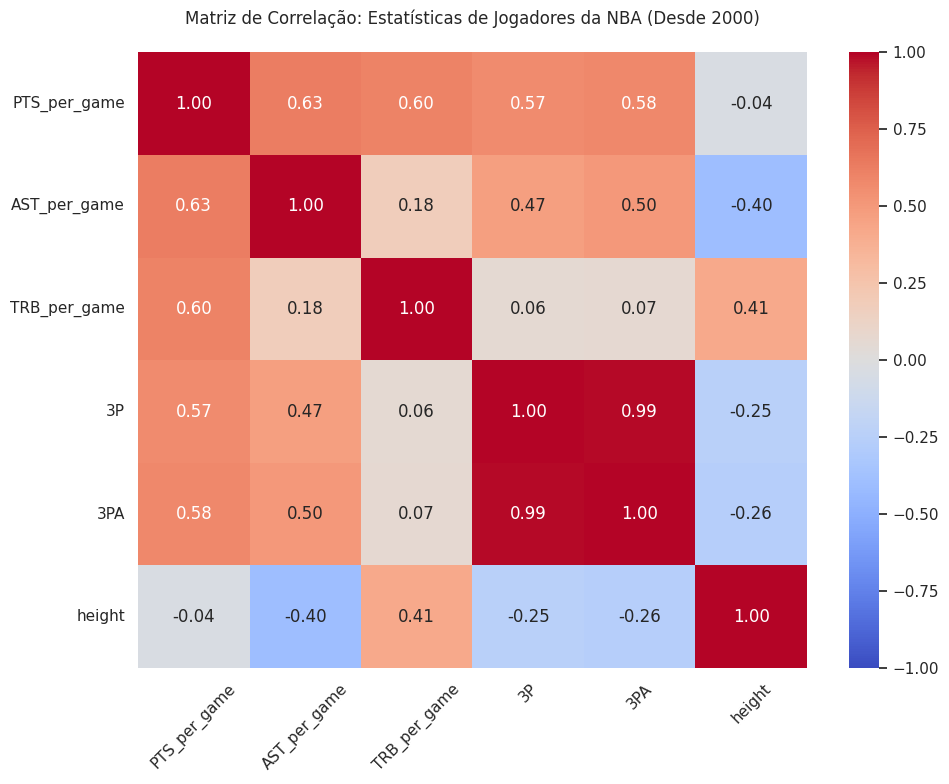

In [27]:
plt.figure(figsize=(10, 8))
# Selecionar colunas numéricas relevantes (ajuste conforme seu DF)
cols_corr = ['PTS_per_game', 'AST_per_game', 'TRB_per_game', '3P', '3PA', 'height']
sns.heatmap(
    df_stats[cols_corr].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1, vmax=1,  # Fixa escala entre -1 e 1
)
plt.title('Matriz de Correlação: Estatísticas de Jogadores da NBA (Desde 2000)', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**ANÁLISE DA MATRIZ DE CORRELAÇÃO**

O heatmap revela relações significativas entre as variáveis analisadas:

1.**Tentativas vs. Conversão de 3 Pontos**

- Identifica-se correlação quase perfeita (r ≈ 1.0) entre:
 - 3PA (tentativas de 3 pontos)
 - 3P (conversões de 3 pontos)

Relação esperada, dado que a conversão depende necessariamente da tentativa

2.**Rebotes vs. Jogo Externo**

- Correlação quase zero entre:
 - TRB_per_game (rebotes por jogo)
 - Estatísticas de jogo externo (3PA e 3P)

**Explicação tática:**
- Jogadores com alta média de rebotes (geralmente pivôs)
- Atuam predominantemente no garrafão
- Menor participação em jogadas de três pontos

3.**Assistências vs. Estatísticas Ofensivas**

- Correlações positivas significativas entre:
 - AST_per_game (assistências por jogo)
 - Demais métricas ofensivas (exceto rebotes)

**Padrão condizente com:**
- Função primária dos armadores (PG)
- Seu papel na criação de jogadas ofensivas

4.**Altura vs. Rebotes (TRB_per_game)**
- Correlação positiva moderada (0.41)
 - Confirma que jogadores mais altos tendem a ter mais rebotes por jogo.

**Justificativa tática:**
- A altura facilita a interceptação de bolas altas e o posicionamento no garrafão.

5.**Altura vs. Pontos por jogo (PTS_per_game)**
- Correlação insignificante (-0.04)
 - Indica que altura não é fator determinante para pontuação.

**Explicação:**
- Jogadores baixos (ex.: Stephen Curry - 1,91m) podem ser os maiores pontuadores.
- A pontuação depende mais de habilidades técnicas (arremesso, dribles) do que de altura.

6.**Altura vs. Arremessos de 3 pontos (3P e 3PA)**
 - Correlação negativa fraca (-0.25 a -0.26)
  - Sugere que jogadores mais baixos tentam/acertam mais cestas de 3.

**Contexto da NBA moderna:**
- Armadores (PGs) e alas-armadores (SGs), geralmente menos altos, são os principais arremessadores de 3.
- Jogadores altos (Cs/PFs) focam em jogadas internas (garrafão).

7.**Altura vs. Assistências por jogo (AST_per_game)**
 - Correlação negativa moderada (-0.40)
  - Reforça que jogadores mais baixos (PGs/SGs) lideram em assistências.

**Razão tática:**
- Armadores são os principais organizadores do ataque.